# Lab 4. Keras and Deep Feedforward Network

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os
USE_GPU = False

In [2]:
if USE_GPU:
    # Use GPU if avaliable 
    print(f"TensorFlow version: {tf.__version__}")
    print("CUDA version:")
    print(os.popen('nvcc --version').read())
    with_cuda = tf.test.is_built_with_cuda()
    print(f"Build with CUDA: {with_cuda}")
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
    for x in tf.config.experimental.list_physical_devices('GPU'): print(x)

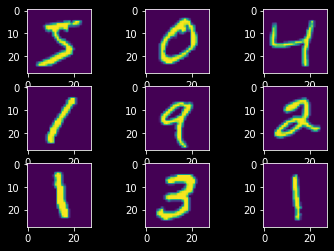

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(Image.fromarray(x_train[i]))
plt.show()

In [4]:
batch_size = 128
num_classes = 10
# epochs = 20
epochs = 100

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
from tqdm.keras import TqdmCallback
from tqdm import tqdm_notebook
from livelossplot import PlotLossesKeras

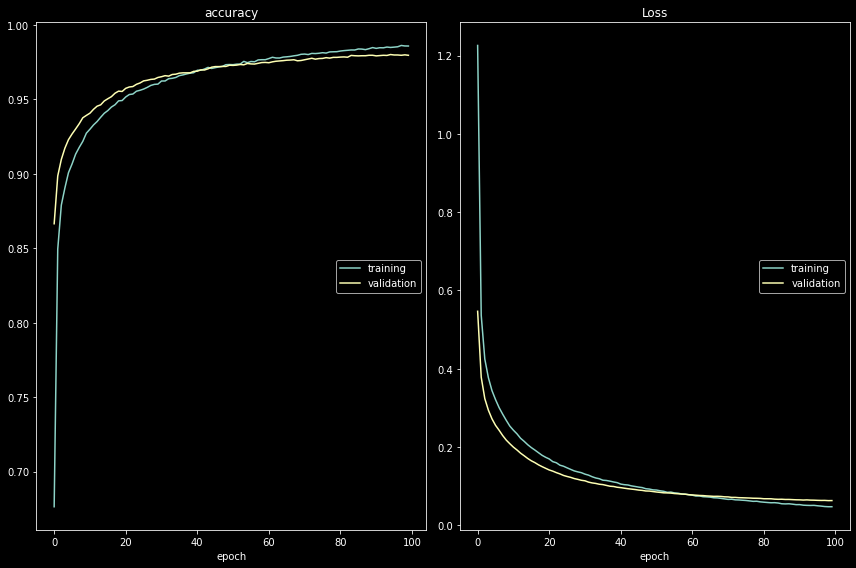

accuracy
	training         	 (min:    0.676, max:    0.986, cur:    0.986)
	validation       	 (min:    0.867, max:    0.980, cur:    0.980)
Loss
	training         	 (min:    0.048, max:    1.226, cur:    0.048)
	validation       	 (min:    0.063, max:    0.547, cur:    0.064)
Test loss: 0.06350308656692505
Test accuracy: 0.9797000288963318
Wall time: 3min 6s


In [10]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test), 
                    callbacks=[
                        TqdmCallback(verbose=1,tqdm_class=tqdm_notebook, leave = True),
                        PlotLossesKeras()
                        ]
                    )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Text(0.5, 1.0, 'Accuracy Curves')

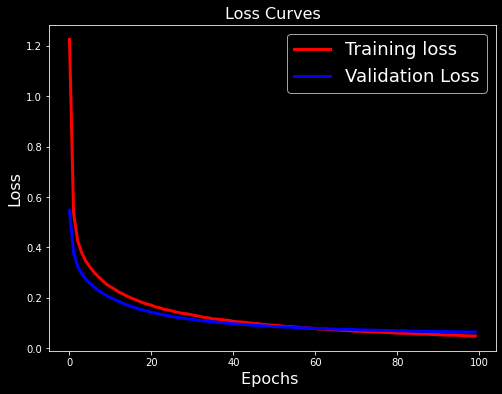

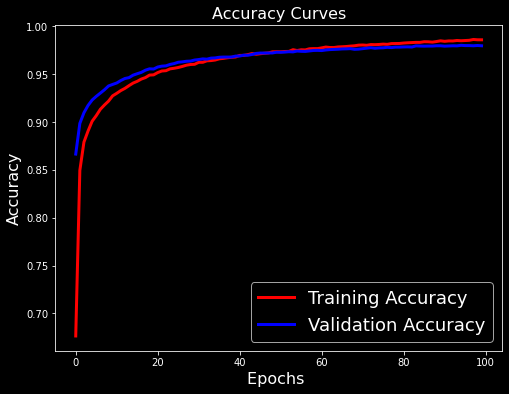

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Assignment 

In [12]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams["figure.figsize"] = (7,10)
plt.rcParams["figure.facecolor"]=(0, 0, 0, 0)
plt.rcParams["axes.facecolor"]=(0, 0, 0, 0)
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import pydot

Draw the computation graph for the following function: 
$$𝑓(𝑎, 𝑏, 𝑐, 𝑑, 𝑒) = \frac{1}{(1+(a^b+c^d)\times e)^2}$$

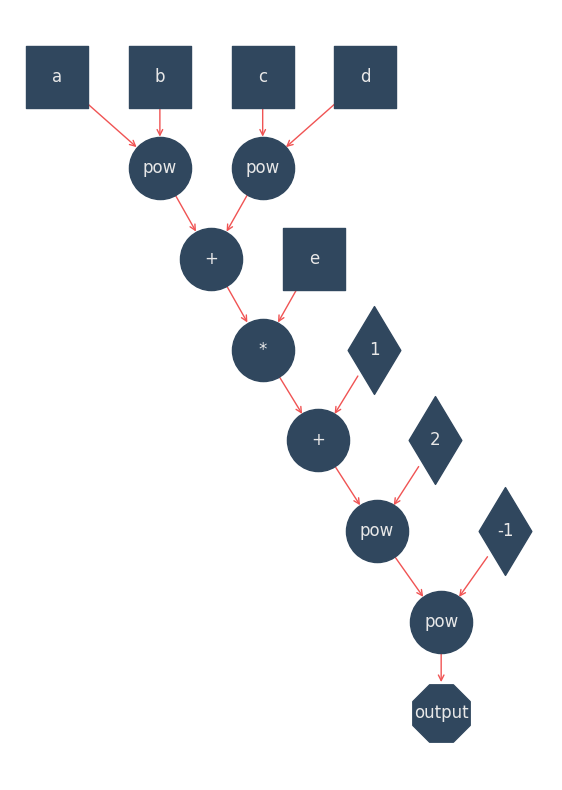

In [13]:

G = nx.DiGraph()
G.add_node('a',shape='s', lable='a')
G.add_node('b',shape='s', lable='b')
G.add_node('c',shape='s', lable='c')
G.add_node('d',shape='s', lable='d')
G.add_node('e',shape='s', lable='e')
G.add_node('const_1',shape='d', lable='1')
G.add_node('const_2',shape='d', lable='2')
G.add_node('const_-1',shape='d', lable='-1')
G.add_node('a**b',shape='o', lable='pow')
G.add_node('c**d',shape='o', lable='pow')
G.add_node('ab+cd',shape='o', lable='+')
G.add_node('abcd*e',shape='o', lable='*')
G.add_node('abcde+1',shape='o', lable='+')
G.add_node('abcde1**2',shape='o', lable='pow')
G.add_node('abcde12**-1',shape='o', lable='pow')
G.add_node('f',shape='8', lable='output')

G.add_edges_from([('a','a**b'), ('b','a**b'), ('c','c**d'), ('d','c**d')])
G.add_edges_from([('a**b', 'ab+cd'), ('c**d', 'ab+cd')])
G.add_edges_from([('ab+cd', 'abcd*e'), ('e', 'abcd*e')])
G.add_edges_from([('abcd*e', 'abcde+1'), ('const_1', 'abcde+1')])
G.add_edges_from([('abcde+1', 'abcde1**2'), ('const_2', 'abcde1**2')])
G.add_edges_from([('abcde1**2', 'abcde12**-1'), ('const_-1', 'abcde12**-1')])
G.add_edges_from([('abcde12**-1', 'f')])

plt.axis('off')
pos = graphviz_layout(G, prog="dot", root = 'f')
pos = nx.rescale_layout_dict(pos, scale=10)

nodeShapes = set((aShape[1]["shape"] for aShape in G.nodes(data = True)))
for aShape in nodeShapes: 
    filteredlist = [sNode for sNode in filter(lambda x: x[1]["shape"]==aShape, G.nodes(data = True))]
    nodelist = [n[0] for n in filteredlist]
    nodelable = {}
    for n in filteredlist: nodelable[n[0]] = n[1]["lable"]
    nx.draw_networkx_nodes(G,pos, node_size= 2000, node_shape = aShape, nodelist = nodelist, node_color='#30475e')
    nx.draw_networkx_labels(G,pos,nodelable,font_size=12, font_color='#e8e8e8')

nx.draw_networkx(G, pos, arrows=True, arrowstyle= '->', node_size= 2000, nodelist=[], with_labels=False, edge_color='#f05454')

Compute the gradient of the function with respect it to its inputs at (a, b, c, d, e) = (1, 1, 1, 1, 1) (refer to Lecture 3)

## Code Solution: 

In [14]:
from scipy.misc import derivative
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)
f = lambda a,b,c,d,e: ((1+(a**b+c**d)*e)**2)**-1
[partial_derivative(f, i, [1]*f.__code__.co_argcount) for i in range(f.__code__.co_argcount)]

[-0.07407407408288602, 0.0, -0.07407407408288602, 0.0, -0.14814814815189425]

## Manual Calculation: 
$$
\nabla f(a,b,c,d,e) = \nabla \left(\frac{1}{(e(a^b +c^d)+1)^2}\right)=\left(\frac{\delta f}{\delta a},\frac{\delta f}{\delta b},\frac{\delta f}{\delta c},\frac{\delta f}{\delta d},\frac{\delta f}{\delta e}\right)
$$

Function $f(a,b,c,d,e)$ is the composition $F(G(a,b,c,d,e))$ of two functions: 

\begin{align*} 
    F(u) &= \frac{1}{u^2}\\
    G(a,b,c,d,e) &= 1+e(a^b +c^d)
\end{align*}

Therefore chain rule can be applied as following: 

\begin{align*} 
\frac{d}{d a} \left(F{\left(G{\left(a \right)} \right)}\right) &= \frac{d}{d u} \left(F{\left(u \right)}\right) \frac{d}{d a} \left(G{\left(a \right)}\right)\\
\frac{d}{d b} \left(F{\left(G{\left(b \right)} \right)}\right) &= \frac{d}{d u} \left(F{\left(u \right)}\right) \frac{d}{d b} \left(G{\left(b \right)}\right)\\
\frac{d}{d c} \left(F{\left(G{\left(c \right)} \right)}\right) &= \frac{d}{d u} \left(F{\left(u \right)}\right) \frac{d}{d c} \left(G{\left(c \right)}\right)\\
\frac{d}{d d} \left(F{\left(G{\left(d \right)} \right)}\right) &= \frac{d}{d u} \left(F{\left(u \right)}\right) \frac{d}{d d} \left(G{\left(d \right)}\right)\\
\frac{d}{d e} \left(F{\left(G{\left(e \right)} \right)}\right) &= \frac{d}{d u} \left(F{\left(u \right)}\right) \frac{d}{d e} \left(G{\left(e \right)}\right)
\end{align*}


## $\color{#f05454}{\frac{\delta f}{\delta a}}$:
\begin{align*} 
    \left(\frac{d}{d a} \left(\frac{1}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{2}}\right)\right) &= \left(\frac{d}{d u} \left(\frac{1}{u^{2}}\right) \frac{d}{d a} \left(1 + e \left(a^{b} + c^{d}\right)\right)\right)\\ 
    &= \frac{d}{d a} \left(1 + e \left(a^{b} + c^{d}\right)\right) {\left(- \frac{2}{u^{3}}\right)}\\
    &= - \frac{2 \left(\frac{d}{d a} \left(1\right) + {\left(e \frac{d}{d a} \left(a^{b} + c^{d}\right)\right)}\right)}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
    &= - \frac{2 e {\left(\frac{d}{d a} \left(a^{b}\right) + \frac{d}{d a} \left(c^{d}\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
    &= - \frac{2 e \left(b a^{-1 + b} + {\left(0\right)}\right)}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
    &=\color{#f05454}{-\frac{2ea^{b-1}b}{(e(a^b + c^d)+1)^3}}
\end{align*}

## $\color{#f05454}{\frac{\delta f}{\delta b}}$:

\begin{align*} 
{\left(\frac{d}{d b} \left(\frac{1}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{2}}\right)\right)} &= {\left(\frac{d}{d u} \left(\frac{1}{u^{2}}\right) \frac{d}{d b} \left(1 + e \left(a^{b} + c^{d}\right)\right)\right)}\\
&= \frac{d}{d b} \left(1 + e \left(a^{b} + c^{d}\right)\right) {\left(- \frac{2}{u^{3}}\right)}\\
&= - \frac{2 {\left(\frac{d}{d b} \left(1\right) + \frac{d}{d b} \left(e \left(a^{b} + c^{d}\right)\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= - \frac{2 e {\left(\frac{d}{d b} \left(a^{b}\right) + \frac{d}{d b} \left(c^{d}\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= \color{#f05454}{- \frac{2 e a^{b} \ln{\left(a \right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}}
\end{align*} 

## $\color{#f05454}{\frac{\delta f}{\delta c}}$:
\begin{align*} 
{\left(\frac{d}{d c} \left(\frac{1}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{2}}\right)\right)} &= {\left(\frac{d}{d u} \left(\frac{1}{u^{2}}\right) \frac{d}{d c} \left(1 + e \left(a^{b} + c^{d}\right)\right)\right)}\\
&= \frac{d}{d c} \left(1 + e \left(a^{b} + c^{d}\right)\right) {\left(- \frac{2}{u^{3}}\right)}\\
&= - \frac{2 {\left(\frac{d}{d c} \left(1\right) + \frac{d}{d c} \left(e \left(a^{b} + c^{d}\right)\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= - \frac{2 e {\left(\frac{d}{d c} \left(a^{b}\right) + \frac{d}{d c} \left(c^{d}\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&=\color{#f05454}{ - \frac{2 d e c^{-1 + d}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}}
\end{align*} 

## $\color{#f05454}{\frac{\delta f}{\delta d}}$:
\begin{align*} 
{\left(\frac{d}{d d} \left(\frac{1}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{2}}\right)\right)} &= {\left(\frac{d}{d u} \left(\frac{1}{u^{2}}\right) \frac{d}{d d} \left(1 + e \left(a^{b} + c^{d}\right)\right)\right)}\\
& = \frac{d}{d d} \left(1 + e \left(a^{b} + c^{d}\right)\right) {\left(- \frac{2}{u^{3}}\right)}\\
&= - \frac{2 {\left(\frac{d}{d d} \left(1\right) + \frac{d}{d d} \left(e \left(a^{b} + c^{d}\right)\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= - \frac{2 e {\left(\frac{d}{d d} \left(a^{b}\right) + \frac{d}{d d} \left(c^{d}\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= \color{#f05454}{- \frac{2 e c^{d} \ln{\left(c \right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}}
\end{align*} 

## $\color{#f05454}{\frac{\delta f}{\delta e}}$:
\begin{align*} 
{\left(\frac{d}{d e} \left(\frac{1}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{2}}\right)\right)} &= {\left(\frac{d}{d u} \left(\frac{1}{u^{2}}\right) \frac{d}{d e} \left(1 + e \left(a^{b} + c^{d}\right)\right)\right)}\\
&= \frac{d}{d e} \left(1 + e \left(a^{b} + c^{d}\right)\right) {\left(- \frac{2}{u^{3}}\right)}\\
&= - \frac{2 {\left(\frac{d}{d e} \left(1\right) + \frac{d}{d e} \left(e \left(a^{b} + c^{d}\right)\right)\right)}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= - \frac{2 \left(\left(a^{b} + c^{d}\right) {\left(1\right)} + \frac{d}{d e} \left(1\right)\right)}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}\\
&= \color{#f05454}{- \frac{2 a^{b} + 2 c^{d}}{\left(1 + e \left(a^{b} + c^{d}\right)\right)^{3}}}
\end{align*} 

\begin{align*} 
\nabla f(a,b,c,d,e) &= \nabla \left(\frac{1}{(e(a^b +c^d)+1)^2}\right)\\
&=\left(\frac{\delta f}{\delta a},\frac{\delta f}{\delta b},\frac{\delta f}{\delta c},\frac{\delta f}{\delta d},\frac{\delta f}{\delta e}\right)\\
&=\left(- \frac{2 a^{b - 1} b e}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{3}},- \frac{2 a^{b} e \ln{\left(a \right)}}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{3}},- \frac{2 c^{d - 1} d e}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{3}},- \frac{2 c^{d} e \ln{\left(c \right)}}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{3}},- \frac{2 a^{b} + 2 c^{d}}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{3}}\right)
\end{align*} 

# $$\color{#f05454}{\nabla \left(\frac{1}{\left(e \left(a^{b} + c^{d}\right) + 1\right)^{2}}\right)|_{\left(a,b,c,d,e\right)=\left(1,1,1,1,1\right)}=\left(- \frac{2}{27},0,- \frac{2}{27},0,- \frac{4}{27}\right)}$$